# Read in label dataframe

In [303]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [1]:
label = pd.read_csv('algoDefLabel.csv')

In [5]:
label['bb'] = label['algoDefine'].apply(lambda x: int(x))

Text(0, 0.5, 'Bull / Bear')

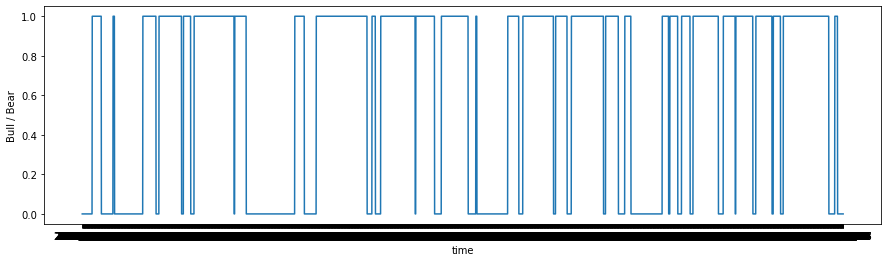

In [279]:
%matplotlib inline
fig = plt.figure(figsize=(15,4))
# fig = plt.figure()
ax = plt.axes()
# ax.plot(return_df.columns, return_df.iloc[0, :], label='daily')
ax.plot(label.Date, label.algoDefine)
# ax.plot(return_df.columns, return_df.iloc[1, :], label='0050_daily')
# ax.plot(label.algoDefine, cumu_return.iloc[:, 1], label='0050_CumulativeReturn')
ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('Bull / Bear')  # Add a y-label to the axes.
# ax.legend();  # Add a legend.

Text(0, 0.5, 'Bull / Bear')

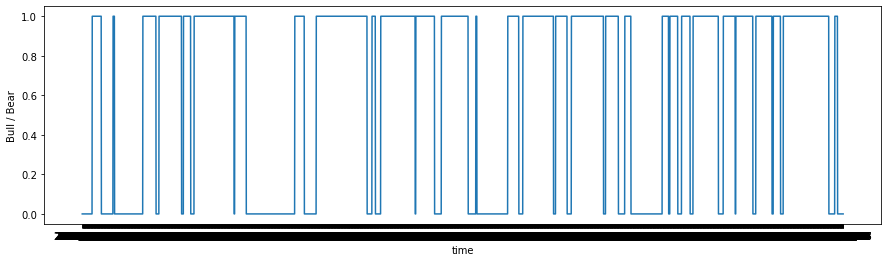

In [280]:
%matplotlib inline
fig = plt.figure(figsize=(15,4))
# fig = plt.figure()
ax = plt.axes()
# ax.plot(return_df.columns, return_df.iloc[0, :], label='daily')
ax.plot(label.Date, label.bb)
# ax.plot(return_df.columns, return_df.iloc[1, :], label='0050_daily')
# ax.plot(label.algoDefine, cumu_return.iloc[:, 1], label='0050_CumulativeReturn')
ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('Bull / Bear')  # Add a y-label to the axes.
# ax.legend();  # Add a legend.

In [10]:
label.loc[label.algoDefine==True, :]

,X,Date,close_adj,volume,algoDefine,bb
48,47,2008/03/18,9531.68,4125332,True,1
49,48,2008/03/19,9675.44,4846936,True,1
50,49,2008/03/20,9862.66,5536206,True,1
51,50,2008/03/21,10084.30,6495413,True,1
52,51,2008/03/24,10486.91,8726549,True,1
...,...,...,...,...,...,...
3546,3545,2022/05/25,32030.51,5451206,True,1
3547,3546,2022/05/26,31762.00,5589281,True,1
3548,3547,2022/05/27,32353.78,5481897,True,1
3549,3548,2022/05/30,33038.79,6285048,True,1


In [18]:
margin = pd.read_csv('margin_20050103_20220511.csv', encoding='big5')

In [55]:
filtered_margin = margin[['年月日', '融資餘額(張)', '融資餘額(千元)', '融券餘額(張)', '融券餘額(千元)', '借券賣出餘額(張)', '借券賣出餘額(千元)', '借券賣出可使用額度', '借券賣出限額', '券資比']]

In [27]:
# for i in margin.columns:
#     print(i, end='  ')

公司代碼  簡稱  年月日  

#### 融資餘額(張)  融資餘額(千元)  
    融資買進(張)  融資買進(千元)  
    融資賣出(張)  融資賣出(千元)  
    融資現金償還(張)  融資現金償還(千元)  
    融資增減(張)  融資增減(千元)  融資增減比率  
    融資使用率  融資限額  

#### 融券餘額(張)  融券餘額(千元)  
    融券買進(張)  融券買進(千元)  
    融券賣出(張)  融券賣出(千元)  
    融券現券償還(張)  融券現券償還(千元)  
    融券增減(張)  融券增減(千元)  融券增減比率  
    融券使用率  融券限額  

是否可信用交易(Y)  #### 券資比  資券互抵  當日收盤  

融資(買+賣)/成交量 %  融券(買+賣)/成交量 %  

#### 借券賣出餘額(張)  借券賣出餘額(千元)  
    借券賣出(張)  借券賣出(千元)  
    借券賣出庫存異動(張)  借券賣出庫存異動(千元)  
    #### 借券賣出可使用額度  借券賣出限額  
    借券賣出(千元)_交易所  融券賣出(千元)_交易所  

均價  
每股融資成本  每股融券成本  
融資維持率  融券維持率  整戶維持率  

#### CPI總指數

In [56]:
filtered_margin

,年月日,融資餘額(張),融資餘額(千元),融券餘額(張),融券餘額(千元),借券賣出餘額(張),借券賣出餘額(千元),借券賣出可使用額度,借券賣出限額,券資比
0,2005/01/03,20837188,261746919.0,1366359,35716738.50,,,,,6.56
1,2005/01/04,20832463,261850636.0,1321238,33761564.41,,,,,6.34
2,2005/01/05,20885636,262784819.0,1297389,32662108.79,,,,,6.21
3,2005/01/06,20866146,262346848.0,1293191,32174713.23,,,,,6.20
4,2005/01/07,20811804,261582960.0,1276559,31087299.35,,,,,6.13
...,...,...,...,...,...,...,...,...,...,...
4272,2022/05/04,8483629,252497763.0,388583,22595578.84,10974527,531024203.68,1341851,76197874,4.58
4273,2022/05/05,8518787,253143450.0,398061,23445108.11,10906950,535959494.53,1337917,76205474,4.67
4274,2022/05/06,8506707,253016723.0,390208,22495883.07,10824940,523467852.96,1338743,76234516,4.59
4275,2022/05/09,8390725,250125870.0,392470,21799703.83,10948167,519945004.74,1338754,76251750,4.68


In [26]:
label

,X,Date,close_adj,volume,algoDefine,bb
1,0,2008/01/02,9845.42,4383717,False,0
2,1,2008/01/03,9681.17,3666870,False,0
3,2,2008/01/04,9724.82,4633430,False,0
4,3,2008/01/07,9325.32,4550021,False,0
5,4,2008/01/08,9419.41,4638556,False,0
...,...,...,...,...,...,...
3573,3572,2022/07/04,28828.92,6167448,False,0
3574,3573,2022/07/05,29142.05,6676755,False,0
3575,3574,2022/07/06,28467.18,6793881,False,0
3576,3575,2022/07/07,29198.38,6800402,False,0


In [300]:
df = filtered_margin.merge(label[['Date', 'close_adj', 'bb']], left_on='年月日', right_on='Date')

In [301]:
df

,年月日,融資餘額(張),融資餘額(千元),融券餘額(張),融券餘額(千元),借券賣出餘額(張),借券賣出餘額(千元),借券賣出可使用額度,借券賣出限額,券資比,Date,close_adj,bb
0,2008/01/02,17416413,330226419.0,446743,22386158.26,941766,40182569.36,15829848,52766131,2.57,2008/01/02,9845.42,0
1,2008/01/03,17457081,332032980.0,431996,20588767.58,943067,38679629.96,15820023,52733376,2.47,2008/01/03,9681.17,0
2,2008/01/04,17515892,334346118.0,448848,20666002.95,933568,38116807.14,15815849,52719469,2.56,2008/01/04,9724.82,0
3,2008/01/07,17446380,333416251.0,430747,19149243.61,938141,36351105.52,15816449,52721469,2.47,2008/01/07,9325.32,0
4,2008/01/08,17459758,333013941.0,451952,19760438.32,948282,36230978.44,16106439,53688104,2.59,2008/01/08,9419.41,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3530,2022/05/04,8483629,252497763.0,388583,22595578.84,10974527,531024203.68,1341851,76197874,4.58,2022/05/04,32947.47,0
3531,2022/05/05,8518787,253143450.0,398061,23445108.11,10906950,535959494.53,1337917,76205474,4.67,2022/05/05,33206.59,0
3532,2022/05/06,8506707,253016723.0,390208,22495883.07,10824940,523467852.96,1338743,76234516,4.59,2022/05/06,32633.97,0
3533,2022/05/09,8390725,250125870.0,392470,21799703.83,10948167,519945004.74,1338754,76251750,4.68,2022/05/09,31919.41,0


# Random Forest Example

### n_classes(4) * n_clusters_per_class(2) must be smaller or equal 2**n_informative(2)=4

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
# X, y = make_classification(n_samples=1000, n_features=4, n_informative=2, n_redundant=0, random_state=0, shuffle=False)
X, y = make_classification(n_samples=1000, n_features=20, n_classes=4, n_informative=4, shuffle=True)
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X, y)

print(clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))

[2]


In [51]:
X.shape

(1000, 20)

In [59]:
y.shape

(1000,)

In [171]:
df[df['年月日'] < '2021/01/01']

,年月日,融資餘額(張),融資餘額(千元),融券餘額(張),融券餘額(千元),借券賣出餘額(張),借券賣出餘額(千元),借券賣出可使用額度,借券賣出限額,券資比,Date,bb
0,2008/01/02,17416413,330226419.0,446743,22386158.26,941766,40182569.36,15829848,52766131,2.57,2008/01/02,0
1,2008/01/03,17457081,332032980.0,431996,20588767.58,943067,38679629.96,15820023,52733376,2.47,2008/01/03,0
2,2008/01/04,17515892,334346118.0,448848,20666002.95,933568,38116807.14,15815849,52719469,2.56,2008/01/04,0
3,2008/01/07,17446380,333416251.0,430747,19149243.61,938141,36351105.52,15816449,52721469,2.47,2008/01/07,0
4,2008/01/08,17459758,333013941.0,451952,19760438.32,948282,36230978.44,16106439,53688104,2.59,2008/01/08,0
...,...,...,...,...,...,...,...,...,...,...,...,...
3205,2020/12/25,8745028,184261341.0,1163281,27977389.83,8162513,329407523.66,1792119,72503262,13.30,2020/12/25,1
3206,2020/12/28,8868468,186790038.0,1197623,29302775.94,8221767,333830873.72,1810826,72498309,13.50,2020/12/28,1
3207,2020/12/29,8777489,185949806.0,1185802,28971069.69,8234700,334385107.12,1836023,72502998,13.51,2020/12/29,1
3208,2020/12/30,8842775,187131498.0,1176219,29232796.17,8249918,335615679.12,1854665,72501128,13.30,2020/12/30,1


In [199]:
from sklearn.metrics import confusion_matrix

split = 3210
delay = 5

print((df.iloc[:, 1:-3].values).shape)
print((df.iloc[:, -1].values).shape)
X = df.iloc[:-delay, 1:-3].values
y = df.iloc[delay:, -1].values
X_train = df.iloc[:split-delay, 1:-3].values
y_train = df.iloc[delay:split, -1].values
X_test = df.iloc[split-delay:-delay, 1:-3].values
y_test = df.iloc[split:, -1].values
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(3535, 9)
(3535,)
(3205, 9) (3205,) (325, 9) (325,)


In [200]:
clf = RandomForestClassifier()

for epoch in range(10):
    clf.fit(X_train, y_train)
    y_predict = clf.predict(X_test)
    confusionMatrix = confusion_matrix(y_test, y_predict)
    print(confusionMatrix)
    accuracy = (confusionMatrix[0, 0]+confusionMatrix [1,1])/sum(sum(confusionMatrix))
    print(accuracy)

[[  2  43]
 [  4 276]]
0.8553846153846154
[[ 19  26]
 [ 17 263]]
0.8676923076923077
[[ 15  30]
 [  5 275]]
0.8923076923076924
[[  0  45]
 [  2 278]]
0.8553846153846154
[[  3  42]
 [  4 276]]
0.8584615384615385
[[ 16  29]
 [  4 276]]
0.8984615384615384
[[ 19  26]
 [  7 273]]
0.8984615384615384
[[ 16  29]
 [ 12 268]]
0.8738461538461538
[[ 18  27]
 [ 13 267]]
0.8769230769230769
[[  1  44]
 [  2 278]]
0.8584615384615385


# 測試看看預測幾天後的準確率比較高

In [205]:
for delay in range(1, 20):
    split = 3210
    X = df.iloc[:-delay, 1:-3].values
    y = df.iloc[delay:, -1].values
    X_train = df.iloc[:split-delay, 1:-3].values
    y_train = df.iloc[delay:split, -1].values
    X_test = df.iloc[split-delay:-delay, 1:-3].values
    y_test = df.iloc[split:, -1].values
    
    clf = RandomForestClassifier()
    
    accuracy_list = []
    
    for epoch in range(10):
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        confusionMatrix = confusion_matrix(y_test, y_predict)
#         print(confusionMatrix)
        accuracy = (confusionMatrix[0, 0]+confusionMatrix [1,1])/sum(sum(confusionMatrix))
#         print(accuracy)
        accuracy_list.append(accuracy)
    print('Delay: ', delay, 'Average Accuracy: ', sum(accuracy_list)/len(accuracy_list))

Delay:  1 Average Accuracy:  0.8615384615384615
Delay:  2 Average Accuracy:  0.8624615384615385
Delay:  3 Average Accuracy:  0.8630769230769231
Delay:  4 Average Accuracy:  0.858153846153846
Delay:  5 Average Accuracy:  0.8695384615384615
Delay:  6 Average Accuracy:  0.8710769230769231
Delay:  7 Average Accuracy:  0.9043076923076925
Delay:  8 Average Accuracy:  0.9049230769230769
Delay:  9 Average Accuracy:  0.9015384615384615
Delay:  10 Average Accuracy:  0.8280000000000001
Delay:  11 Average Accuracy:  0.7886153846153846
Delay:  12 Average Accuracy:  0.7227692307692307
Delay:  13 Average Accuracy:  0.7319999999999999
Delay:  14 Average Accuracy:  0.644
Delay:  15 Average Accuracy:  0.6966153846153845
Delay:  16 Average Accuracy:  0.696
Delay:  17 Average Accuracy:  0.6104615384615385
Delay:  18 Average Accuracy:  0.7553846153846153
Delay:  19 Average Accuracy:  0.7409230769230769


In [206]:
for delay in range(1, 30):
    split = 3210
    X = df.iloc[:-delay, 1:-3].values
    y = df.iloc[delay:, -1].values
    X_train = df.iloc[:split-delay, 1:-3].values
    y_train = df.iloc[delay:split, -1].values
    X_test = df.iloc[split-delay:-delay, 1:-3].values
    y_test = df.iloc[split:, -1].values
    
    clf = RandomForestClassifier()
    
    accuracy_list = []
    
    for epoch in range(10):
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        confusionMatrix = confusion_matrix(y_test, y_predict)
#         print(confusionMatrix)
        accuracy = (confusionMatrix[0, 0]+confusionMatrix [1,1])/sum(sum(confusionMatrix))
#         print(accuracy)
        accuracy_list.append(accuracy)
    print('Delay: ', delay, 'Average Accuracy: ', sum(accuracy_list)/len(accuracy_list))

Delay:  1 Average Accuracy:  0.8655384615384616
Delay:  2 Average Accuracy:  0.8587692307692307
Delay:  3 Average Accuracy:  0.8630769230769231
Delay:  4 Average Accuracy:  0.8541538461538462
Delay:  5 Average Accuracy:  0.8655384615384614
Delay:  6 Average Accuracy:  0.8756923076923077
Delay:  7 Average Accuracy:  0.8987692307692308
Delay:  8 Average Accuracy:  0.9083076923076921
Delay:  9 Average Accuracy:  0.8941538461538461
Delay:  10 Average Accuracy:  0.8689230769230768
Delay:  11 Average Accuracy:  0.8295384615384617
Delay:  12 Average Accuracy:  0.7787692307692308
Delay:  13 Average Accuracy:  0.6636923076923077
Delay:  14 Average Accuracy:  0.7052307692307693
Delay:  15 Average Accuracy:  0.7735384615384615
Delay:  16 Average Accuracy:  0.5553846153846155
Delay:  17 Average Accuracy:  0.547076923076923
Delay:  18 Average Accuracy:  0.7270769230769231
Delay:  19 Average Accuracy:  0.7726153846153846
Delay:  20 Average Accuracy:  0.7778461538461537
Delay:  21 Average Accuracy:  

In [207]:
for delay in range(8, 9):
    split = 3210
    X = df.iloc[:-delay, 1:-3].values
    y = df.iloc[delay:, -1].values
    X_train = df.iloc[:split-delay, 1:-3].values
    y_train = df.iloc[delay:split, -1].values
    X_test = df.iloc[split-delay:-delay, 1:-3].values
    y_test = df.iloc[split:, -1].values
    
    clf = RandomForestClassifier()
    
    accuracy_list = []
    
    for epoch in range(10):
        clf.fit(X_train, y_train)
        y_predict = clf.predict(X_test)
        confusionMatrix = confusion_matrix(y_test, y_predict)
#         print(confusionMatrix)
        accuracy = (confusionMatrix[0, 0]+confusionMatrix [1,1])/sum(sum(confusionMatrix))
#         print(accuracy)
        accuracy_list.append(accuracy)
    print('Delay: ', delay, 'Average Accuracy: ', sum(accuracy_list)/len(accuracy_list))

Delay:  8 Average Accuracy:  0.9012307692307694


# 建立 rolling models & predictions

In [216]:
clf1 = RandomForestClassifier()
clf5 = RandomForestClassifier()
clf10 = RandomForestClassifier()
clf15 = RandomForestClassifier()
clf20 = RandomForestClassifier()

for year in range(2010, 2022):
    
    split = df[df['年月日'] < str(year)+'/01/01'].shape[0] # 3210
    end = df[df['年月日'] < str(year+1)+'/01/01'].shape[0] 
    
    for delay in [1, 5, 10, 15, 20]:
        
        if delay == 1:
            clf = clf1
        elif delay == 5:
            clf = clf5
        elif delay == 10:
            clf = clf10
        elif delay == 15:
            clf = clf15
        elif delay == 20:
            clf = clf20
            

        X_train = df.iloc[:split-delay, 1:-3].values
        y_train = df.iloc[delay:split, -1].values
        X_test = df.iloc[split-delay:end-delay, 1:-3].values
        y_test = df.iloc[split:end, -1].values

#         print('\n', X_train.shape, y_train.shape, X_test.shape, y_test.shape)
        print('\n')

        accuracy_list = []

        for epoch in range(10):
            clf.fit(X_train, y_train)
            y_predict = clf.predict(X_test)
            confusionMatrix = confusion_matrix(y_test, y_predict)
    #         print(confusionMatrix)
            accuracy = (confusionMatrix[0, 0]+confusionMatrix [1,1])/sum(sum(confusionMatrix))
    #         print(accuracy)
            accuracy_list.append(accuracy)
        print('Year: ', year, 'Delay: ', delay, 'Average Accuracy: ', sum(accuracy_list)/len(accuracy_list))
    


 (499, 9) (499,) (251, 9) (251,)
Year:  2010 Delay:  1 Average Accuracy:  0.9231075697211155

 (495, 9) (495,) (251, 9) (251,)
Year:  2010 Delay:  5 Average Accuracy:  0.9274900398406374

 (490, 9) (490,) (251, 9) (251,)
Year:  2010 Delay:  10 Average Accuracy:  0.7310756972111555

 (485, 9) (485,) (251, 9) (251,)
Year:  2010 Delay:  15 Average Accuracy:  0.4055776892430279

 (480, 9) (480,) (251, 9) (251,)
Year:  2010 Delay:  20 Average Accuracy:  0.9007968127490038

 (750, 9) (750,) (247, 9) (247,)
Year:  2011 Delay:  1 Average Accuracy:  0.08097165991902834

 (746, 9) (746,) (247, 9) (247,)
Year:  2011 Delay:  5 Average Accuracy:  0.08259109311740889

 (741, 9) (741,) (247, 9) (247,)
Year:  2011 Delay:  10 Average Accuracy:  0.08380566801619432

 (736, 9) (736,) (247, 9) (247,)
Year:  2011 Delay:  15 Average Accuracy:  0.08178137651821862

 (731, 9) (731,) (247, 9) (247,)
Year:  2011 Delay:  20 Average Accuracy:  0.08097165991902834

 (997, 9) (997,) (250, 9) (250,)
Year:  2012 Del

Good Performance (10 days delay: 70% up) : 10, 13, 14, 20, 21

Not Bad (10 days delay: 30% up, about 50%) : 17, 18

Bad Performance (10 days delay: 30% down) : 11, 12, 15, 16, 19

In [275]:
clf1 = RandomForestClassifier()
clf5 = RandomForestClassifier()
clf10 = RandomForestClassifier()
clf15 = RandomForestClassifier()
clf20 = RandomForestClassifier()

for year in range(2010, 2023):
    
    split = df[df['年月日'] < str(year)+'/01/01'].shape[0] # 3210
    start = df[df['年月日'] < str(year-1)+'/01/01'].shape[0] # 3210
    end = df[df['年月日'] < str(year+1)+'/01/01'].shape[0] 
    
    for delay in [1, 5, 10, 15, 20]:
        
        if delay == 1:
            clf = clf1
        elif delay == 5:
            clf = clf5
        elif delay == 10:
            clf = clf10
        elif delay == 15:
            clf = clf15
        elif delay == 20:
            clf = clf20
            

        X_train = df.iloc[:split-delay, 1:-3].values
        y_train = df.iloc[delay:split, -1].values
        X_test = df.iloc[split-delay:end-delay, 1:-3].values
        y_test = df.iloc[split:end, -1].values

        print('\n', X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#         print('\n')

        accuracy_list = []

        for epoch in range(10):
            clf.fit(X_train, y_train)
            y_predict = clf.predict(X_test)
            confusionMatrix = confusion_matrix(y_test, y_predict)
    #         print(confusionMatrix)
            accuracy = (confusionMatrix[0, 0]+confusionMatrix [1,1])/sum(sum(confusionMatrix))
    #         print(accuracy)
            accuracy_list.append(accuracy)
        print('Year: ', year, 'Delay: ', delay, 'Average Accuracy: ', sum(accuracy_list)/len(accuracy_list))
    


 (499, 9) (499,) (251, 9) (251,)
Year:  2010 Delay:  1 Average Accuracy:  0.9258964143426294

 (495, 9) (495,) (251, 9) (251,)
Year:  2010 Delay:  5 Average Accuracy:  0.9131474103585656

 (490, 9) (490,) (251, 9) (251,)
Year:  2010 Delay:  10 Average Accuracy:  0.6685258964143427

 (485, 9) (485,) (251, 9) (251,)
Year:  2010 Delay:  15 Average Accuracy:  0.38247011952191234

 (480, 9) (480,) (251, 9) (251,)
Year:  2010 Delay:  20 Average Accuracy:  0.894820717131474

 (750, 9) (750,) (247, 9) (247,)
Year:  2011 Delay:  1 Average Accuracy:  0.08097165991902834

 (746, 9) (746,) (247, 9) (247,)
Year:  2011 Delay:  5 Average Accuracy:  0.0825910931174089

 (741, 9) (741,) (247, 9) (247,)
Year:  2011 Delay:  10 Average Accuracy:  0.08461538461538462

 (736, 9) (736,) (247, 9) (247,)
Year:  2011 Delay:  15 Average Accuracy:  0.08259109311740889

 (731, 9) (731,) (247, 9) (247,)
Year:  2011 Delay:  20 Average Accuracy:  0.08097165991902834

 (997, 9) (997,) (250, 9) (250,)
Year:  2012 Dela

# 畫圖

In [248]:
def drawBullLabel(dailyLabel):
    if dailyLabel[1] == True:
        return dailyLabel[0]
    else:
        return float('nan')
    
def drawBearLabel(dailyLabel):
    if dailyLabel[1] == False:
        return dailyLabel[0]
    else:
        return float('nan')

drawBull = label[['close_adj', 'algoDefine']].apply(lambda x: drawBullLabel(x), axis=1)
drawBear = label[['close_adj', 'algoDefine']].apply(lambda x: drawBearLabel(x), axis=1)

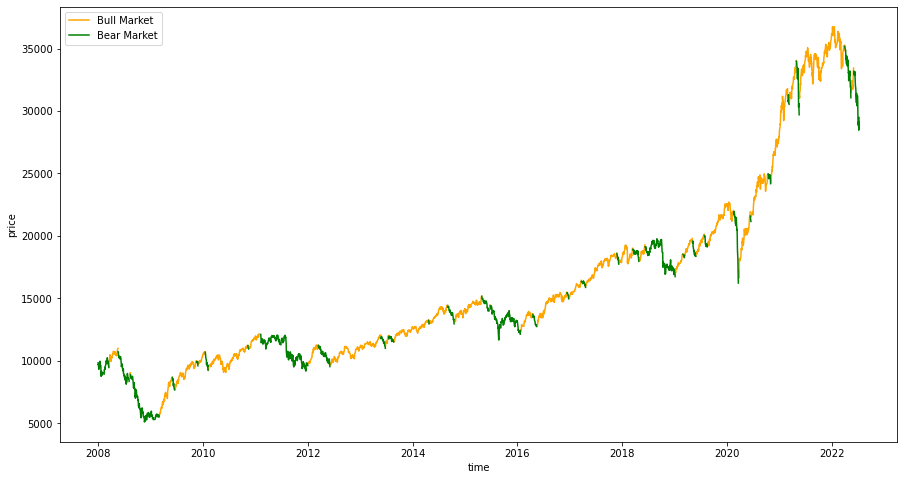

In [272]:
import matplotlib.pyplot as plt

%matplotlib inline
fig = plt.figure(figsize=(15,8))
# fig = plt.figure()
ax = plt.axes()

# for i in label.index:
ax.plot(pd.to_datetime(label.Date), drawBull, label='Bull Market', color='orange')
ax.plot(pd.to_datetime(label.Date), drawBear, label='Bear Market', color='green')

ax.set_xlabel('time')  # Add an x-label to the axes.
ax.set_ylabel('price')  # Add a y-label to the axes.
ax.legend();  # Add a legend.

In [270]:
pd.to_datetime(label.Date)

1      2008-01-02
2      2008-01-03
3      2008-01-04
4      2008-01-07
5      2008-01-08
          ...    
3573   2022-07-04
3574   2022-07-05
3575   2022-07-06
3576   2022-07-07
3577   2022-07-08
Name: Date, Length: 3577, dtype: datetime64[ns]

# Add other basic factors

EA1101: 2

EB0308: 14

EB0311: 17

EB0312: 18

EB18: 26

EB23: 31

EC03: 35

EC08: 38

LA07 LA0702: 41 42

#### MA1601: 43

#### PA0110 PA0118: 52 54

In [386]:
pd.read_excel('/Users/arthur/Desktop/bbmarket/index_data/data/tejdb_20220512103424.xls', header=2)

,年月,數值,預估(F)
0,2022/03,10.92,P
1,2022/02,11.08,P
2,2022/01,11.49,P
3,2021/12,12.75,P
4,2021/11,14.18,P
...,...,...,...
202,2005/05,5.91,P
203,2005/04,6.10,R
204,2005/03,8.24,P
205,2005/02,10.06,P


In [384]:
df_2 = copy.copy(df)
df_2['年月'] = df['年月日'].apply(lambda x: x[:7])
print(df_2)

files = os.listdir('/Users/arthur/Desktop/bbmarket/index_data/data/')
files = sorted(files)

for i in range(len(files)):
    if i in [2, 14, 17, 18, 26, 31, 35, 38, 41, 42, 43, 52, 54]:
        factor_df = pd.read_excel('/Users/arthur/Desktop/bbmarket/index_data/data/'+files[i])
        
        name = factor_df.columns[0][:-21]
        factor_df.columns =  [factor_df.iloc[1, 0], name, factor_df.iloc[1, 2]]
        factor_df = factor_df.iloc[2:, :].reset_index(drop=True)
        factor_df.columns.name=''
        
        df_2 = df_2.merge(factor_df[['年月', name]], left_on='年月', right_on='年月')
print(df_2)

             年月日   融資餘額(張)     融資餘額(千元)  融券餘額(張)     融券餘額(千元)      借券賣出餘額(張)  \
0     2008/01/02  17416413  330226419.0   446743  22386158.26         941766   
1     2008/01/03  17457081  332032980.0   431996  20588767.58         943067   
2     2008/01/04  17515892  334346118.0   448848  20666002.95         933568   
3     2008/01/07  17446380  333416251.0   430747  19149243.61         938141   
4     2008/01/08  17459758  333013941.0   451952  19760438.32         948282   
...          ...       ...          ...      ...          ...            ...   
3530  2022/05/04   8483629  252497763.0   388583  22595578.84       10974527   
3531  2022/05/05   8518787  253143450.0   398061  23445108.11       10906950   
3532  2022/05/06   8506707  253016723.0   390208  22495883.07       10824940   
3533  2022/05/09   8390725  250125870.0   392470  21799703.83       10948167   
3534  2022/05/10   8303845  248696514.0   378888  20708153.69       10969392   

           借券賣出餘額(千元)      借券賣出可使用額度   

In [385]:
df_2

,年月日,融資餘額(張),融資餘額(千元),融券餘額(張),融券餘額(千元),借券賣出餘額(張),借券賣出餘額(千元),借券賣出可使用額度,借券賣出限額,券資比,...,EB0312 台灣-未來六個月的景氣狀況指數-月(指數),EB18 台灣-消費者信心指數-月(指數),EB23 台灣-消費者信心指數-未來半年投資股票時機-月(指數),EC03 台灣-平均薪資-製造業(經季節調整)-台幣-月(元)(TWD),EC08 台灣股價指數變動率-月均值(百分比),LA07 台灣-失業率-月(百分比),LA0702 台灣-失業率(經季節調整)-月(百分比),MA1601 台灣-貨幣總計數-M2年增率-期底-月(百分比),PA0110 台灣-CPI總指數(2016=100)-月(指數),PA0118 台灣-CPI-總指數(經季節調整)(2016=100)-月(指數)
0,2012/07/02,11354601,184332247.0,395935,18643061.95,3693871,142760926.58,339002,61809354,3.49,...,28.8,75.08,43.6,42906,-17.21,4.31,4.26,3.43,97.56,97.26
1,2012/07/03,11324432,183747671.0,389262,18319450.81,3699195,143115378.27,341893,61817934,3.44,...,28.8,75.08,43.6,42906,-17.21,4.31,4.26,3.43,97.56,97.26
2,2012/07/04,11329324,183677252.0,390571,18671529.97,3705894,144267872.06,345615,61819624,3.45,...,28.8,75.08,43.6,42906,-17.21,4.31,4.26,3.43,97.56,97.26
3,2012/07/05,11320420,185002482.0,400849,19049557.46,3694344,143275412.99,348739,61820174,3.54,...,28.8,75.08,43.6,42906,-17.21,4.31,4.26,3.43,97.56,97.26
4,2012/07/06,11288395,185211790.0,377755,18360801.82,3687225,142397746.56,350158,61820112,3.35,...,28.8,75.08,43.6,42906,-17.21,4.31,4.26,3.43,97.56,97.26
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2363,2022/02/21,9047852,269854700.0,472224,29151444.56,9607059,508445990.39,1368664,75265561,5.22,...,65.1,73.19,49.7,43175,12.28,3.65,3.67,7.65,105.99,106.66
2364,2022/02/22,8976335,267507030.0,452167,24839569.14,9657960,496051938.90,1385297,75312961,5.04,...,65.1,73.19,49.7,43175,12.28,3.65,3.67,7.65,105.99,106.66
2365,2022/02/23,9038706,269379957.0,480971,28138277.79,9636748,502216015.63,1380078,75329736,5.32,...,65.1,73.19,49.7,43175,12.28,3.65,3.67,7.65,105.99,106.66
2366,2022/02/24,8858978,264032674.0,454160,26394300.69,9661815,490698782.38,1406223,75361826,5.13,...,65.1,73.19,49.7,43175,12.28,3.65,3.67,7.65,105.99,106.66


In [398]:
df_2.columns [ list(range(1, 10))+list(range(14,27)) ]

Index(['融資餘額(張)', '融資餘額(千元)', '融券餘額(張)', '融券餘額(千元)', '借券賣出餘額(張)', '借券賣出餘額(千元)',
       '借券賣出可使用額度', '借券賣出限額', '券資比', 'EA1101 台灣-景氣對策信號綜合分數-月(分數)',
       'EB0308 台灣-原物料價格指數-月(指數)', 'EB0311 台灣-進口原物料數量指數-月(指數)',
       'EB0312 台灣-未來六個月的景氣狀況指數-月(指數)', 'EB18 台灣-消費者信心指數-月(指數)',
       'EB23 台灣-消費者信心指數-未來半年投資股票時機-月(指數)',
       'EC03 台灣-平均薪資-製造業(經季節調整)-台幣-月(元)(TWD)', 'EC08 台灣股價指數變動率-月均值(百分比)',
       'LA07 台灣-失業率-月(百分比)', 'LA0702 台灣-失業率(經季節調整)-月(百分比)',
       'MA1601 台灣-貨幣總計數-M2年增率-期底-月(百分比)', 'PA0110 台灣-CPI總指數(2016=100)-月(指數)',
       'PA0118 台灣-CPI-總指數(經季節調整)(2016=100)-月(指數)'],
      dtype='object')

In [403]:
clf1 = RandomForestClassifier()
clf5 = RandomForestClassifier()
clf10 = RandomForestClassifier()
clf15 = RandomForestClassifier()
clf20 = RandomForestClassifier()

for year in range(2014, 2022):
    
    split = df_2[df_2['年月日'] < str(year)+'/01/01'].shape[0] # 3210
    start = df_2[df_2['年月日'] < str(year-1)+'/01/01'].shape[0] # 3210
    end = df_2[df_2['年月日'] < str(year+1)+'/01/01'].shape[0] 
    
    for delay in [1, 5, 10, 15, 20]:
        
        if delay == 1:
            clf = clf1
        elif delay == 5:
            clf = clf5
        elif delay == 10:
            clf = clf10
        elif delay == 15:
            clf = clf15
        elif delay == 20:
            clf = clf20
            

        X_train = df_2.iloc[start:split-delay, list(range(1, 10))+list(range(14,27))].values
        y_train = df_2.iloc[start+delay:split, 12].values
        X_test = df_2.iloc[split-delay:end-delay, list(range(1, 10))+list(range(14,27))].values
        y_test = df_2.iloc[split:end, 12].values

        print('\n', X_train.shape, y_train.shape, X_test.shape, y_test.shape)
#         print('\n')

        accuracy_list = []

        for epoch in range(10):
            clf.fit(X_train, y_train)
            y_predict = clf.predict(X_test)
            confusionMatrix = confusion_matrix(y_test, y_predict)
            print(confusionMatrix)
            accuracy = (confusionMatrix[0, 0]+confusionMatrix [1,1])/sum(sum(confusionMatrix))
    #         print(accuracy)
            accuracy_list.append(accuracy)
        print('Year: ', year, 'Delay: ', delay, 'Average Accuracy: ', sum(accuracy_list)/len(accuracy_list))
    


 (245, 22) (245,) (248, 22) (248,)
Year:  2014 Delay:  1 Average Accuracy:  0.8556451612903228

 (241, 22) (241,) (248, 22) (248,)
Year:  2014 Delay:  5 Average Accuracy:  0.8588709677419357

 (236, 22) (236,) (248, 22) (248,)
Year:  2014 Delay:  10 Average Accuracy:  0.8556451612903226

 (231, 22) (231,) (248, 22) (248,)
Year:  2014 Delay:  15 Average Accuracy:  0.6564516129032258

 (226, 22) (226,) (248, 22) (248,)
Year:  2014 Delay:  20 Average Accuracy:  0.689516129032258

 (247, 22) (247,) (244, 22) (244,)
Year:  2015 Delay:  1 Average Accuracy:  0.3155737704918033

 (243, 22) (243,) (244, 22) (244,)
Year:  2015 Delay:  5 Average Accuracy:  0.3155737704918033

 (238, 22) (238,) (244, 22) (244,)
Year:  2015 Delay:  10 Average Accuracy:  0.3155737704918033

 (233, 22) (233,) (244, 22) (244,)
Year:  2015 Delay:  15 Average Accuracy:  0.3155737704918033

 (228, 22) (228,) (244, 22) (244,)
Year:  2015 Delay:  20 Average Accuracy:  0.3155737704918033

 (243, 22) (243,) (244, 22) (244,)